In [1]:
from othello_rules import *
from othello_net import *
from tensorflow.python.framework import ops
from datetime import datetime
from example_states import *
from feature_extractor import *
from training_utils import *
import numpy as np


In [65]:
def prep_supervised_progress(wrs_file, log=False):
    total_iterations = 0
    its = 0
    its_vector = []
    losses_vector = []
    with open(wrs_file) as f:
        for line in f:
            line_split = line.split(' ')
            prev_its = its
            #print(prev_its)
            its = line_split[4]
            its = int(its[:-1])
            #print(its)
            #print(its - prev_its)
            total_iterations = total_iterations + int(max(0, its - prev_its))
            loss = float(line_split[5])
            its_vector.append(total_iterations)
            losses_vector.append(loss)
            if log:
                print(line_split)
                print(total_iterations)
                print(loss)
    return losses_vector, its_vector

def prep_sane_progress(wrs_file, log=False, section=5):
    total_iterations = 0
    its = 0
    its_vector = []
    losses_vector = []
    learning_rate_checkpoints = []
    with open(wrs_file) as f:
        for line in f:
            line_split = line.split(' ')
            if len(line_split) < 7:
                learning_rate_checkpoints.append(total_iterations+0.5)
                continue
            total_iterations = total_iterations + 1
            loss = float(line_split[section])
            its_vector.append(total_iterations)
            losses_vector.append(loss)
            if log:
                print(line_split)
                print(total_iterations)
                print(loss)
    return losses_vector, its_vector, learning_rate_checkpoints
prep_sane_progress('logfile_sl_10l.txt', False)

def plot_losses(logfile1, logfile2=None):
    print("Now: " + logfile1)
    winrates, deltas, checkpoints = prep_sane_progress(logfile1, False, 6) #
    winrates = winrates[1:] #
    deltas = np.array(deltas[1:]) #
    
    winrates2, deltas2, checkpoints2 = prep_sane_progress(logfile2, False, 6) #
    winrates2 = winrates2[1:] #
    deltas2 = np.array(deltas2[1:]) #
    
    axes = matplotlib.pyplot.gca()
    y_annotate = 1.83
    axes.set_ylim([0.0277, 0.0365])        
    axes.set_xlim([deltas[0],deltas[-1]])
    for xc in checkpoints:
        matplotlib.pyplot.axvline(x=xc, color='k', linestyle='--')
    matplotlib.pyplot.xlabel('Iteration')
    matplotlib.pyplot.ylabel('Loss')
    matplotlib.pyplot.plot(deltas, winrates, color='b') #
    matplotlib.pyplot.plot(deltas2, winrates2, color='green') #
    matplotlib.pyplot.show()

Now: supervised/logfile_sl_7l_reg.txt


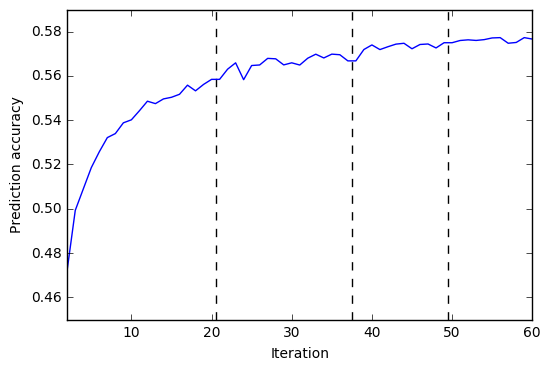

Now: supervised/logfile_sl_8l_reg.txt


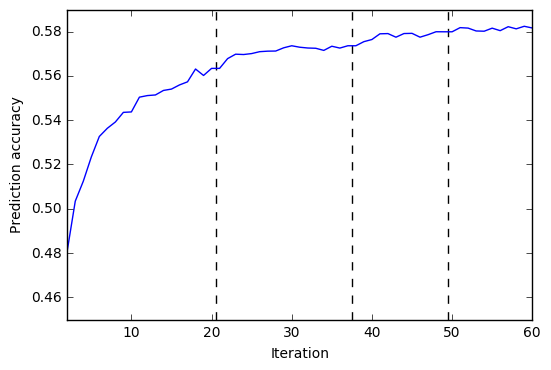

Now: supervised/logfile_sl_9l_reg.txt


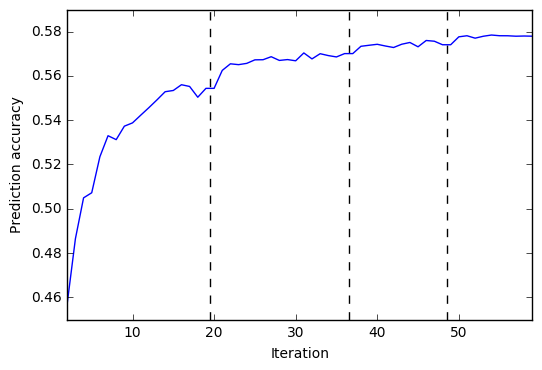

Now: supervised/logfile_sl_10l_reg.txt


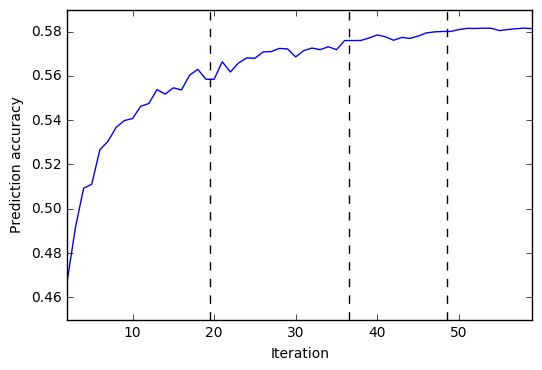

Now: supervised/logfile_sl_7l_reg.txt


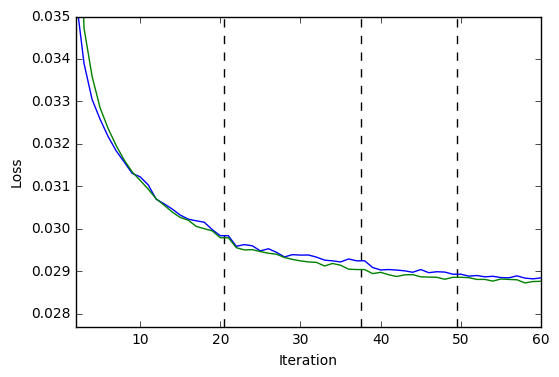

Now: supervised/logfile_sl_8l_reg.txt


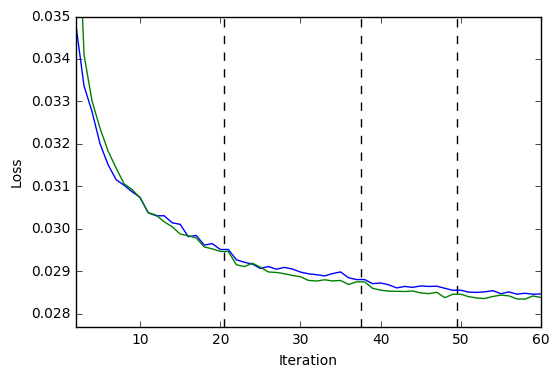

Now: supervised/logfile_sl_9l_reg.txt


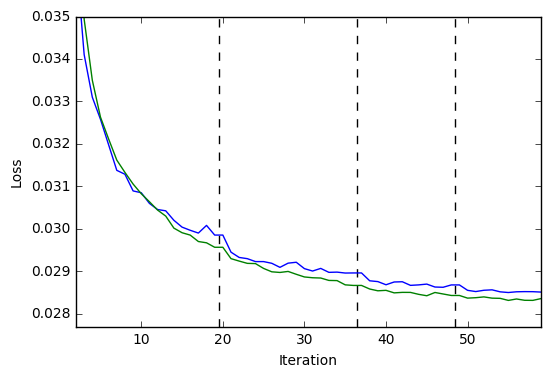

Now: supervised/logfile_sl_10l_reg.txt


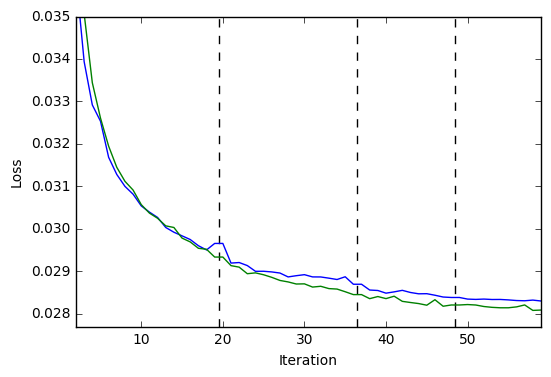

Now: supervised/experiment_no_features/logfile_sl_7l_exp.txt


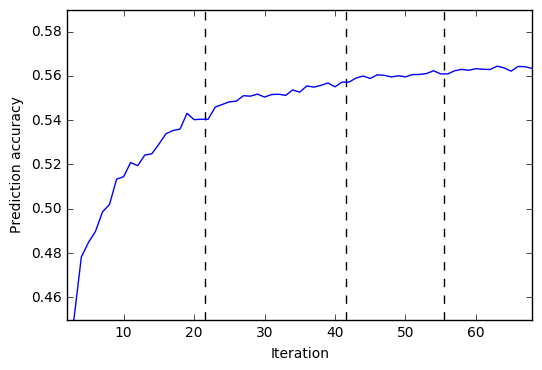

Now: supervised/experiment_no_features/logfile_sl_8l_exp.txt


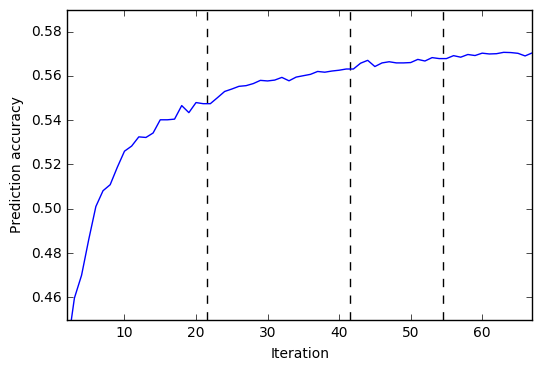

Now: supervised/experiment_no_features/logfile_sl_9l_exp.txt


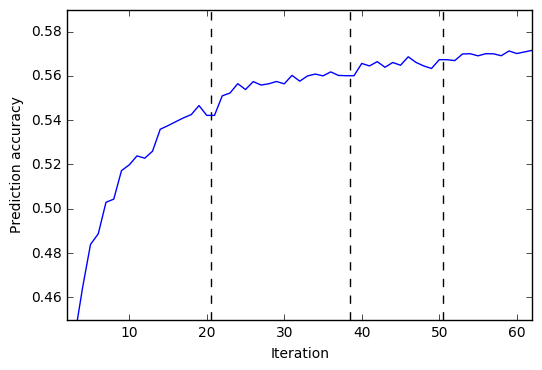

Now: supervised/experiment_no_features/logfile_sl_10l_exp.txt


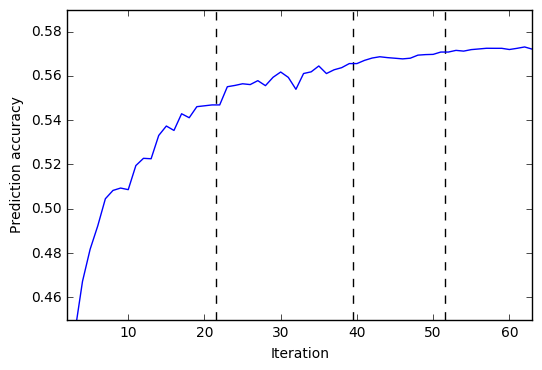

Now: supervised/experiment_no_features/logfile_sl_7l_exp.txt


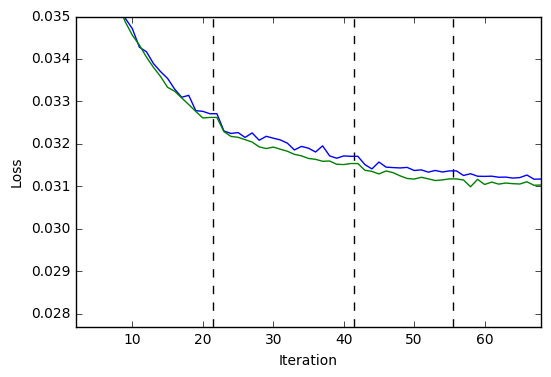

Now: supervised/experiment_no_features/logfile_sl_8l_exp.txt


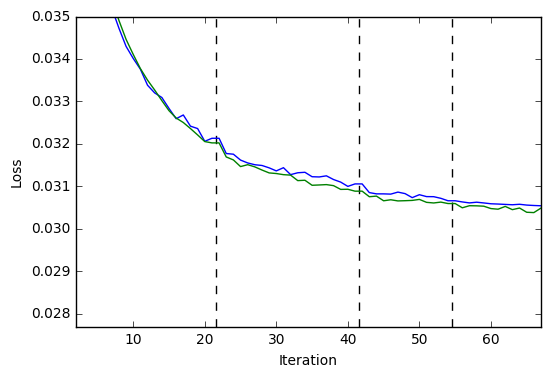

Now: supervised/experiment_no_features/logfile_sl_9l_exp.txt


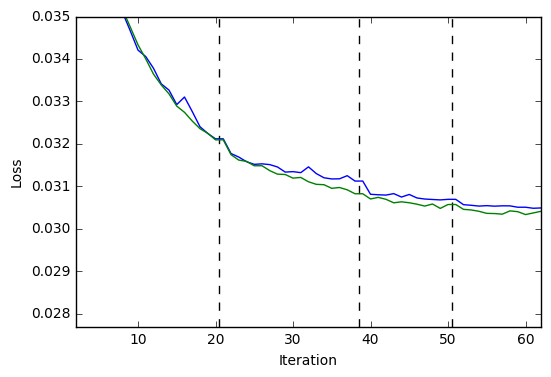

Now: supervised/experiment_no_features/logfile_sl_10l_exp.txt


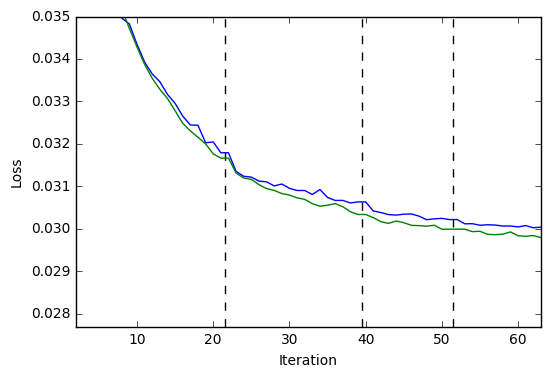

Now: supervised/logfile_sl_7l_reg_train.txt


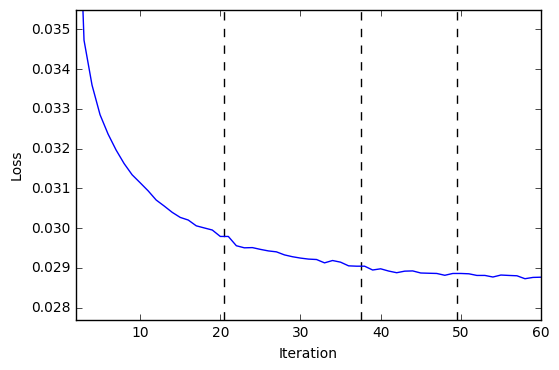

Now: supervised/logfile_sl_8l_reg_train.txt


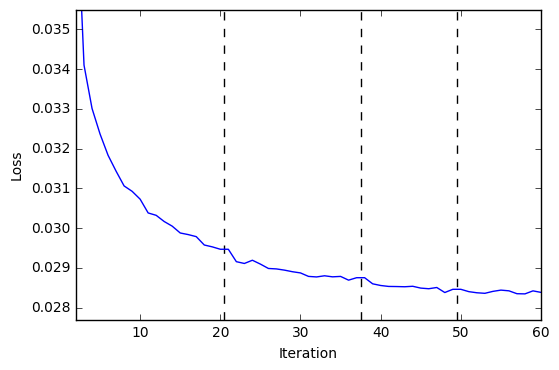

Now: supervised/logfile_sl_9l_reg_train.txt


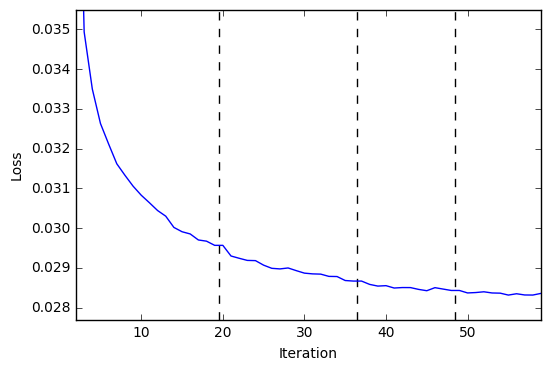

Now: supervised/logfile_sl_10l_reg_train.txt


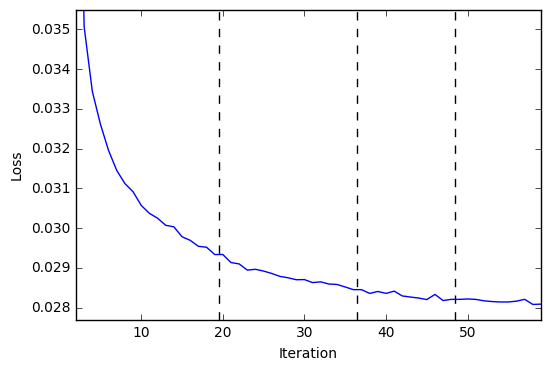

Now: supervised/experiment_no_features/logfile_sl_7l_exp_train.txt


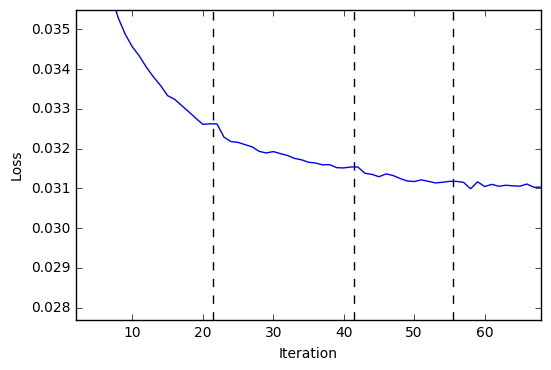

Now: supervised/experiment_no_features/logfile_sl_8l_exp_train.txt


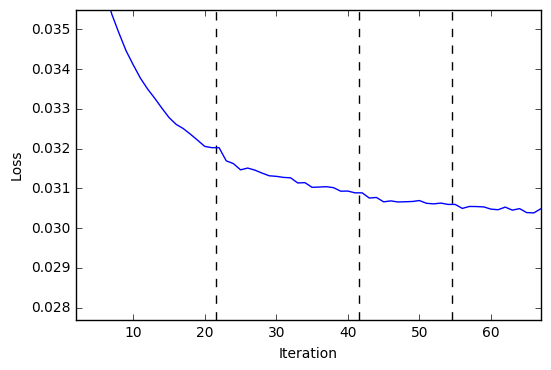

Now: supervised/experiment_no_features/logfile_sl_9l_exp_train.txt


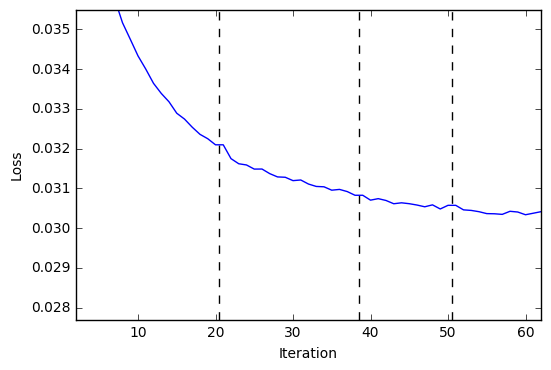

Now: supervised/experiment_no_features/logfile_sl_10l_exp_train.txt


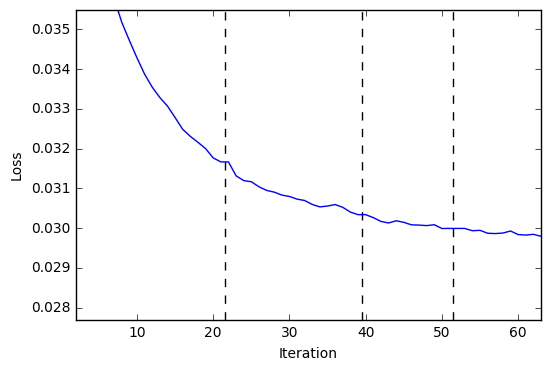

In [64]:
import matplotlib.pyplot
import pylab
import numpy as np
from scipy.stats import linregress
%matplotlib inline

def plot_accuracies(logfile, section=5, correct_loss = False):
    print("Now: " + logfile)
    winrates, deltas, checkpoints = prep_sane_progress(logfile, False, section)
    winrates = winrates[1:]
    deltas = np.array(deltas[1:])
    #deltas = deltas - 2
    axes = matplotlib.pyplot.gca()
    if correct_loss:
        y_annotate = 1.83
        axes.set_ylim([0.0277, 0.0355])        
    elif section == 5:
        y_annotate = 0.585
        axes.set_ylim([0.45, 0.59])
    elif section == 6: 
        y_annotate = 1.83
        axes.set_ylim([1.75, 2.4])

        
    axes.set_xlim([deltas[0],deltas[-1]])
    '''
        matplotlib.pyplot.annotate('learning rate = 1e-4', 
             xy=(deltas[0]+0.25, y_annotate),  
             xycoords='data',
             textcoords='offset points')
    matplotlib.pyplot.annotate('5e-5', 
             xy=(checkpoints[0]+0.0, y_annotate),  
             xycoords='data',
             textcoords='offset points')
    '''

    for xc in checkpoints:
        matplotlib.pyplot.axvline(x=xc, color='k', linestyle='--')
    matplotlib.pyplot.xlabel('Iteration')
    if section == 5:
        matplotlib.pyplot.ylabel('Prediction accuracy')
    else:
        matplotlib.pyplot.ylabel('Loss')
    matplotlib.pyplot.plot(deltas, winrates)
    matplotlib.pyplot.show()

plot_accuracies('supervised/logfile_sl_7l_reg.txt')
plot_accuracies('supervised/logfile_sl_8l_reg.txt')
plot_accuracies('supervised/logfile_sl_9l_reg.txt')
plot_accuracies('supervised/logfile_sl_10l_reg.txt')

#plot_accuracies('supervised/logfile_sl_7l_reg.txt', 6, True)
#plot_accuracies('supervised/logfile_sl_8l_reg.txt', 6, True)
#plot_accuracies('supervised/logfile_sl_9l_reg.txt', 6, True)
#plot_accuracies('supervised/logfile_sl_10l_reg.txt', 6, True)

plot_losses('supervised/logfile_sl_7l_reg.txt', 'supervised/logfile_sl_7l_reg_train.txt')
plot_losses('supervised/logfile_sl_8l_reg.txt', 'supervised/logfile_sl_8l_reg_train.txt')
plot_losses('supervised/logfile_sl_9l_reg.txt', 'supervised/logfile_sl_9l_reg_train.txt')
plot_losses('supervised/logfile_sl_10l_reg.txt', 'supervised/logfile_sl_10l_reg_train.txt')


plot_accuracies('supervised/experiment_no_features/logfile_sl_7l_exp.txt')
plot_accuracies('supervised/experiment_no_features/logfile_sl_8l_exp.txt')
plot_accuracies('supervised/experiment_no_features/logfile_sl_9l_exp.txt')
plot_accuracies('supervised/experiment_no_features/logfile_sl_10l_exp.txt')

plot_losses('supervised/experiment_no_features/logfile_sl_7l_exp.txt', 'supervised/experiment_no_features/logfile_sl_7l_exp_train.txt')
plot_losses('supervised/experiment_no_features/logfile_sl_8l_exp.txt', 'supervised/experiment_no_features/logfile_sl_8l_exp_train.txt')
plot_losses('supervised/experiment_no_features/logfile_sl_9l_exp.txt', 'supervised/experiment_no_features/logfile_sl_9l_exp_train.txt')
plot_losses('supervised/experiment_no_features/logfile_sl_10l_exp.txt', 'supervised/experiment_no_features/logfile_sl_10l_exp_train.txt')

#plot_accuracies('supervised/experiment_no_features/logfile_sl_7l_exp.txt', 6, True)
#plot_accuracies('supervised/experiment_no_features/logfile_sl_8l_exp.txt', 6, True)
#plot_accuracies('supervised/experiment_no_features/logfile_sl_9l_exp.txt', 6, True)
#plot_accuracies('supervised/experiment_no_features/logfile_sl_10l_exp.txt', 6, True)

#New plots after proper val-test-train split



plot_accuracies('supervised/logfile_sl_7l_reg_train.txt', 6, True)
plot_accuracies('supervised/logfile_sl_8l_reg_train.txt', 6, True)
plot_accuracies('supervised/logfile_sl_9l_reg_train.txt', 6, True)
plot_accuracies('supervised/logfile_sl_10l_reg_train.txt', 6, True)

plot_accuracies('supervised/experiment_no_features/logfile_sl_7l_exp_train.txt', 6, True)
plot_accuracies('supervised/experiment_no_features/logfile_sl_8l_exp_train.txt', 6, True)
plot_accuracies('supervised/experiment_no_features/logfile_sl_9l_exp_train.txt', 6, True)
plot_accuracies('supervised/experiment_no_features/logfile_sl_10l_exp_train.txt', 6, True)

Now: supervised/experiment_no_features/logfile_sl_7l_exp.txt


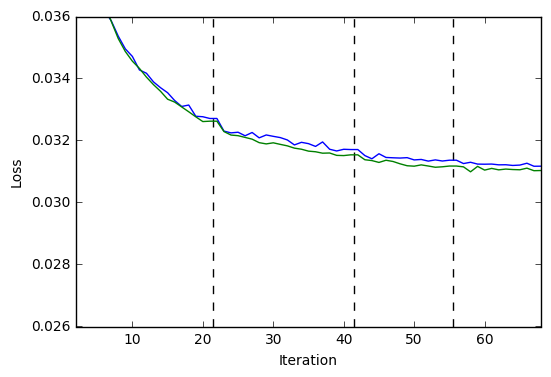

Now: supervised/logfile_sl_7l_reg.txt


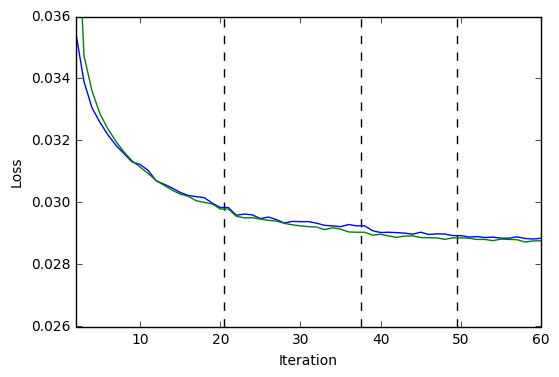

In [59]:

def plot_losses(logfile1, logfile2=None):
    print("Now: " + logfile1)
    winrates, deltas, checkpoints = prep_sane_progress(logfile1, False, 6) #
    winrates = winrates[1:] #
    deltas = np.array(deltas[1:]) #
    
    winrates2, deltas2, checkpoints2 = prep_sane_progress(logfile2, False, 6) #
    winrates2 = winrates2[1:] #
    deltas2 = np.array(deltas2[1:]) #
    
    axes = matplotlib.pyplot.gca()
    y_annotate = 1.83
    axes.set_ylim([0.026, 0.036])        
    axes.set_xlim([deltas[0],deltas[-1]])
    for xc in checkpoints:
        matplotlib.pyplot.axvline(x=xc, color='k', linestyle='--')
    matplotlib.pyplot.xlabel('Iteration')
    matplotlib.pyplot.ylabel('Loss')
    matplotlib.pyplot.plot(deltas, winrates, color='b') #
    matplotlib.pyplot.plot(deltas2, winrates2, color='green') #
    matplotlib.pyplot.show()

    
plot_losses('supervised/experiment_no_features/logfile_sl_7l_exp.txt', 'supervised/experiment_no_features/logfile_sl_7l_exp_train.txt')
plot_losses('supervised/logfile_sl_7l_reg.txt', 'supervised/logfile_sl_7l_reg_train.txt')

#I need to inspect both files, could be some data points missing
